<a href="https://colab.research.google.com/github/RayMe4ever/ML/blob/master/LastMLProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread



import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras.preprocessing import image

Read Data Set

In [3]:
pwd

'/content'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
my_data_dir='/content/drive/MyDrive/Dataset/archive/test_train'

In [7]:
#!unzip /content/drive/MyDrive/Dataset/archive.zip -d /content/drive/MyDrive/Dataset/archive

Archive:  /content/drive/MyDrive/Dataset/archive.zip
  inflating: /content/drive/MyDrive/Dataset/archive/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: /content/drive/MyDrive/Dataset/archive/flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: /content/drive/MyDrive/Dataset/archive/flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: /content/drive/MyDrive/Dataset/archive/flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: /content/drive/MyDrive/Dataset/archive/flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: /content/drive/MyDrive/Dataset/archive/flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: /content/drive/MyDrive/Dataset/archive/flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: /content/drive/MyDrive/Dataset/archive/flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: /content/drive/MyDrive/Dataset/archive/flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: /content/drive/MyDrive/Dataset/archive/flowers/daisy/10437754174_22ec990b7

In [ ]:
Train | Test Split

In [12]:
# Directory where your data is located
data_dir = "/content/drive/MyDrive/Dataset/archive/flowers"

# Labels
labels = ["daisy", "dandelion", "rose", "sunflower", "tulip"]


file_names = []
labels_list = []

# Collect filenames and tags under each tag
for label in labels:
    label_dir = os.path.join(data_dir, label)
    for file_name in os.listdir(label_dir):
        file_names.append(os.path.join(label, file_name))
        labels_list.append(label)

# Split the data set into train and test
train_file_names, test_file_names, train_labels, test_labels = train_test_split(
    file_names, labels_list, test_size=0.2, random_state=42)

print("Train veri seti sayısı:", len(train_file_names))
print("Test veri seti sayısı:", len(test_file_names))

Train veri seti sayısı: 3453
Test veri seti sayısı: 864


In [16]:
train_dir = my_data_dir+'/train_data'
test_dir = my_data_dir+'/test_data'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Saving the train dataset
for file_name, label in zip(train_file_names, train_labels):
    src_file = os.path.join(data_dir, file_name)
    dest_dir = os.path.join(train_dir, label)
    os.makedirs(dest_dir, exist_ok=True)
    shutil.copy(src_file, os.path.join(dest_dir, os.path.basename(file_name)))

# Saving the test dataset
for file_name, label in zip(test_file_names, test_labels):
    src_file = os.path.join(data_dir, file_name)
    dest_dir = os.path.join(test_dir, label)
    os.makedirs(dest_dir, exist_ok=True)
    shutil.copy(src_file, os.path.join(dest_dir, os.path.basename(file_name)))

In [17]:
os.listdir(my_data_dir)

['train_data', 'test_data']

In [18]:
train_path = my_data_dir+'/train_data/'
test_path = my_data_dir+'/test_data/'

In [19]:
os.listdir(train_path)

['daisy', 'tulip', 'rose', 'sunflower', 'dandelion']

In [20]:
os.listdir(test_path)

['tulip', 'rose', 'dandelion', 'sunflower', 'daisy']

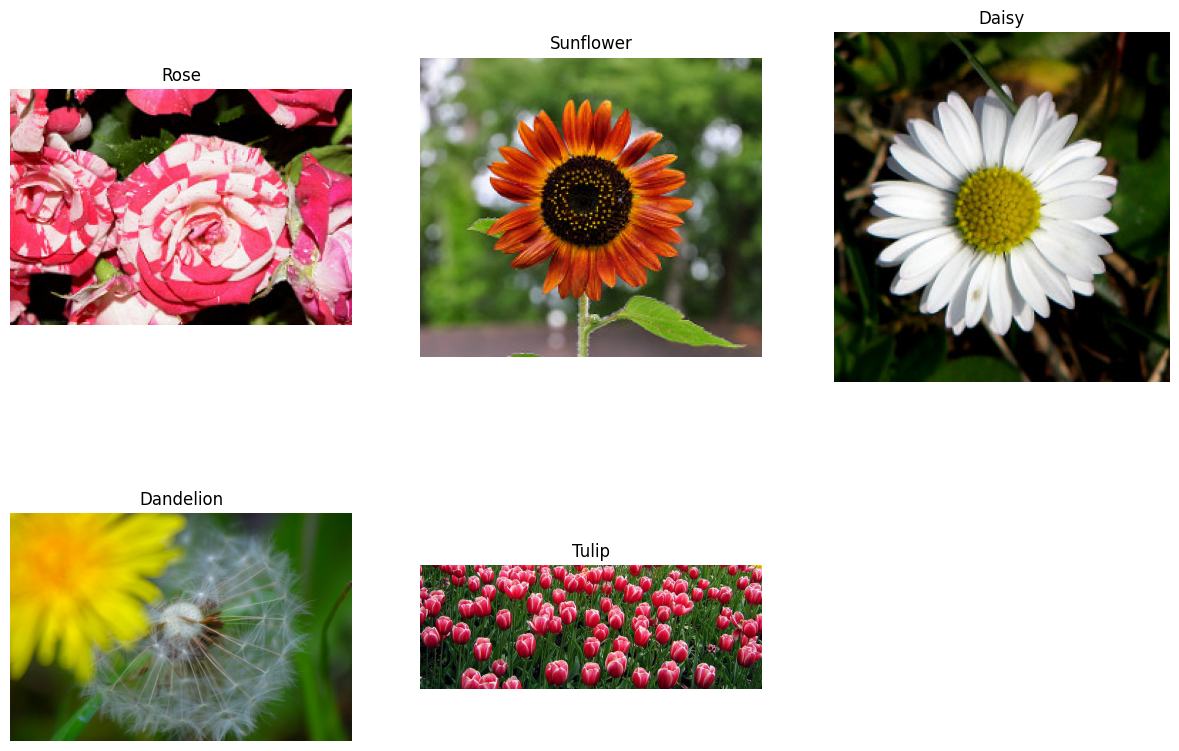

In [21]:
train_path = my_data_dir+'/train_data/'
flowers = ['rose', 'sunflower', 'daisy', 'dandelion', 'tulip']

plt.figure(figsize=(15, 10))

for i, flower in enumerate(flowers, start=1):
    # Construct the directory path for each flower type
    flower_path = os.path.join(train_path, flower)
    # Get the fifth image
    sample_image_name = os.listdir(flower_path)[5]
    sample_image_path = os.path.join(flower_path, sample_image_name)

    # Display the image
    plt.subplot(2, 3, i)
    plt.imshow(plt.imread(sample_image_path))
    plt.title(flower.capitalize())
    plt.axis('off')

plt.show()

Counting the Number of Files in Each Flower Category

In [22]:
roses =len(os.listdir(train_path+'rose'))
sunflowers =len(os.listdir(train_path+'sunflower'))
daisy =len(os.listdir(train_path+'daisy'))
dandelion =len(os.listdir(train_path+'dandelion'))
tulips =len(os.listdir(train_path+'tulip'))


print("Number of files in Roses folder:", roses)
print("Number of files in Sunflowers folder:", sunflowers)
print("Number of files in Daisy folder:", daisy)
print("Number of files in Dandelion folder:", dandelion)
print("Number of files in Tulips folder:", tulips)

Number of files in Roses folder: 629
Number of files in Sunflowers folder: 598
Number of files in Daisy folder: 602
Number of files in Dandelion folder: 829
Number of files in Tulips folder: 795


Determining Common Image Shape

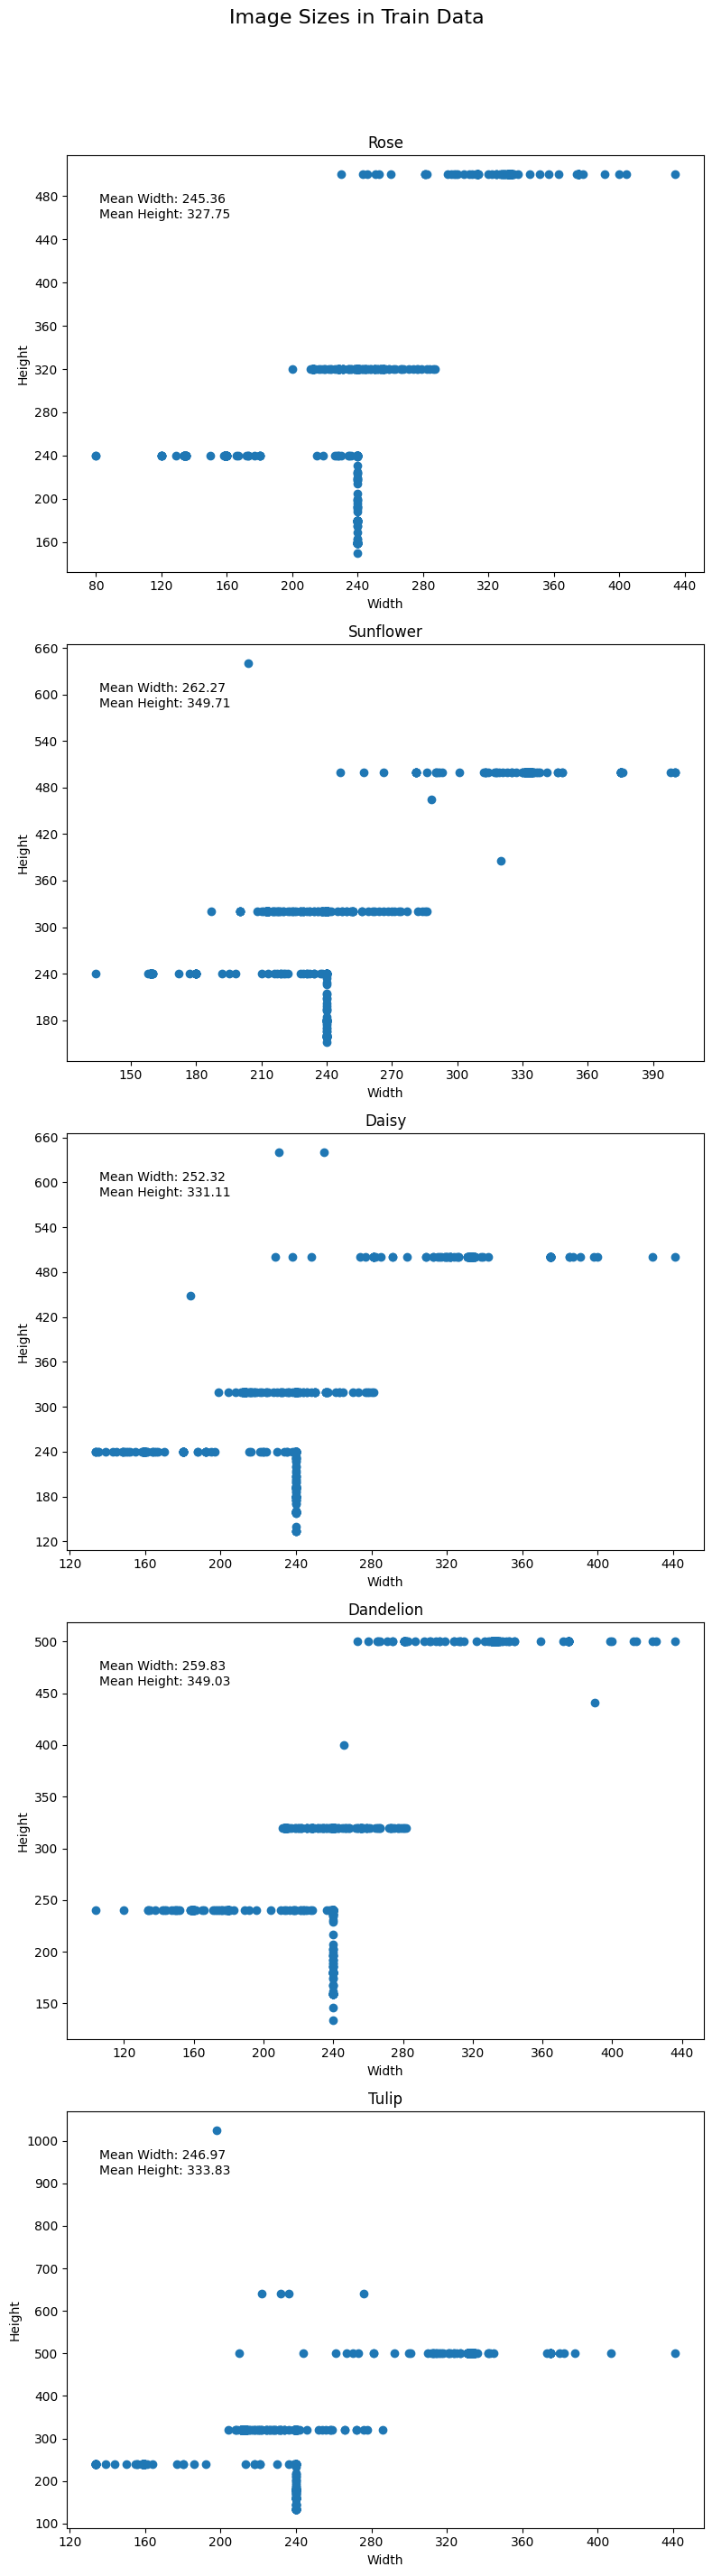

In [23]:
from matplotlib.ticker import MaxNLocator


train_directory = my_data_dir+'/train_data/'


flowers = ['rose', 'sunflower', 'daisy', 'dandelion', 'tulip']


fig, axs = plt.subplots(len(flowers), figsize=(8, 6 * len(flowers)))

for i, flower in enumerate(flowers):

    flower_path = os.path.join(train_directory, flower)


    sizes = []
    for image_file in os.listdir(flower_path):
        image_path = os.path.join(flower_path, image_file)
        img = plt.imread(image_path)
        sizes.append(img.shape)


    axs[i].scatter([size[0] for size in sizes], [size[1] for size in sizes], label=flower)
    axs[i].set_title(flower.capitalize())
    axs[i].set_xlabel('Width')
    axs[i].set_ylabel('Height')
    axs[i].xaxis.set_major_locator(MaxNLocator(integer=True))
    axs[i].yaxis.set_major_locator(MaxNLocator(integer=True))


    mean_width = np.mean([size[0] for size in sizes])
    mean_height = np.mean([size[1] for size in sizes])
    axs[i].text(0.05, 0.85, f'Mean Width: {mean_width:.2f}\nMean Height: {mean_height:.2f}', transform=axs[i].transAxes)

plt.suptitle('Image Sizes in Train Data', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Determining the shapes of images(Среднийн размер изображения)

In [24]:
train_directory = my_data_dir+'/train_data/'


flowers = ['rose', 'sunflower', 'daisy', 'dandelion', 'tulip']


all_widths = []
all_heights = []

for flower in flowers:

    flower_path = os.path.join(train_directory, flower)


    for image_file in os.listdir(flower_path):
        image_path = os.path.join(flower_path, image_file)
        img = plt.imread(image_path)
        height, width, _ = img.shape
        all_widths.append(width)
        all_heights.append(height)


mean_width = int(np.mean(all_widths))
mean_height = int(np.mean(all_heights))

# Creating a common shape
common_shape = (mean_height, mean_width)

print("Common Shape:", common_shape)

Common Shape: (253, 338)


In [31]:
image_shape = (299, 299,3)

Data Augmentation

In [25]:
#ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split = 0.3,
    fill_mode='nearest'
)

#test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
img_height = 299
img_width = 299
batch_size = 32

In [29]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',
    subset="training",
    class_mode='categorical'
)

validation_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
     color_mode='rgb',
    subset="validation",
    class_mode='categorical'
)

#seed=123

Found 2420 images belonging to 5 classes.
Found 1033 images belonging to 5 classes.


CNN Model

In [32]:
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape,  activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',patience=8)

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 148, 148, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 148, 148, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)      

In [34]:
results = model.fit(train_data,epochs=40,
                    validation_data=validation_data,
                    callbacks=[early_stop])

Epoch 1/40
76/76 [==============================] - 129s 2s/step - loss: 1.8017 - accuracy: 0.2475 - val_loss: 1.4559 - val_accuracy: 0.4201
Epoch 2/40
76/76 [==============================] - 102s 1s/step - loss: 1.3480 - accuracy: 0.4198 - val_loss: 1.2894 - val_accuracy: 0.4521
Epoch 3/40
76/76 [==============================] - 99s 1s/step - loss: 1.2350 - accuracy: 0.4599 - val_loss: 1.2852 - val_accuracy: 0.3853
Epoch 4/40
76/76 [==============================] - 98s 1s/step - loss: 1.2275 - accuracy: 0.4558 - val_loss: 1.2435 - val_accuracy: 0.4482
Epoch 5/40
76/76 [==============================] - 95s 1s/step - loss: 1.1734 - accuracy: 0.4806 - val_loss: 1.1974 - val_accuracy: 0.4618
Epoch 6/40
76/76 [==============================] - 96s 1s/step - loss: 1.1336 - accuracy: 0.5174 - val_loss: 1.2218 - val_accuracy: 0.4831
Epoch 7/40
76/76 [==============================] - 94s 1s/step - loss: 1.1178 - accuracy: 0.5401 - val_loss: 1.1215 - val_accuracy: 0.5198
Epoch 8/40
76/76 [

In [35]:
summary = pd.DataFrame(model.history.history)
summary.tail(10)

,loss,accuracy,val_loss,val_accuracy
30,0.738,0.715,0.772,0.705
31,0.704,0.733,0.752,0.732
32,0.695,0.740,0.818,0.715
33,0.735,0.729,0.741,0.711
34,0.675,0.744,0.749,0.732
35,0.725,0.736,0.837,0.705
36,0.660,0.743,0.772,0.724
37,0.663,0.753,0.829,0.699
38,0.634,0.765,0.706,0.731
39,0.629,0.760,0.761,0.728


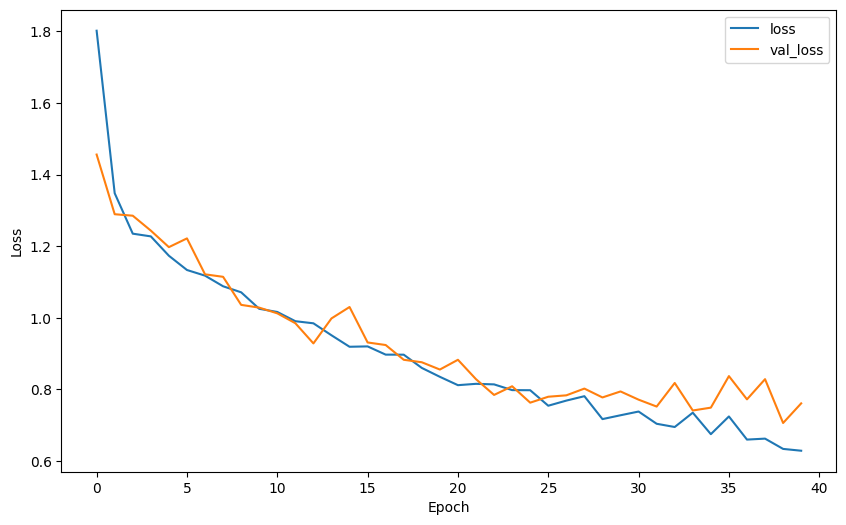

In [36]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

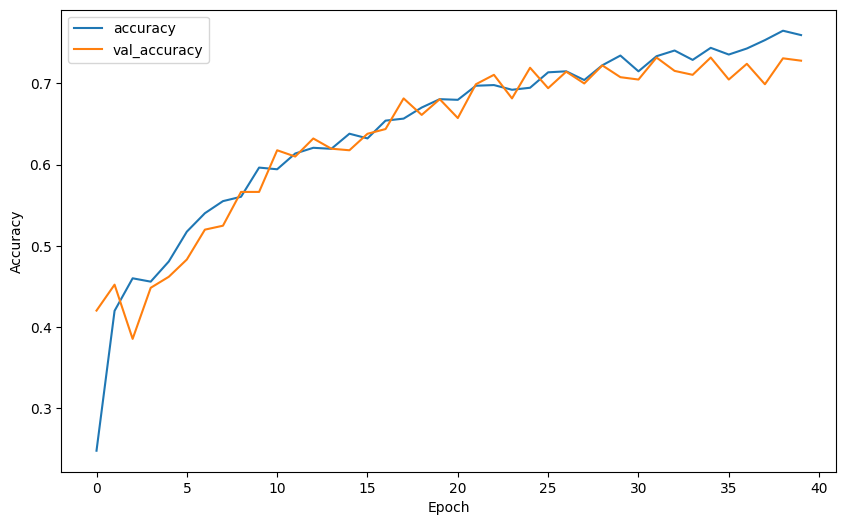

In [37]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [38]:
model.evaluate(train_data)

76/76 [==============================] - 63s 826ms/step - loss: 0.6030 - accuracy: 0.7678


[0.6029735207557678, 0.7677686214447021]

In [39]:
model.evaluate(validation_data)

33/33 [==============================] - 28s 822ms/step - loss: 0.7874 - accuracy: 0.7212


[0.7874066829681396, 0.7212004065513611]

In [40]:
pred_probabilities = model.predict(validation_data)
pred_probabilities

33/33 [==============================] - 27s 789ms/step


array([[2.21079681e-02, 1.86180769e-04, 5.64406157e-01, 3.58827121e-04,
        4.12940830e-01],
       [9.96979475e-01, 2.96626869e-03, 8.44424903e-06, 3.07593764e-05,
        1.50709811e-05],
       [1.90836370e-01, 6.38368845e-01, 7.33705685e-02, 2.41026152e-02,
        7.33216256e-02],
       ...,
       [3.95497493e-03, 2.47938238e-04, 8.86384487e-01, 8.42891495e-06,
        1.09404095e-01],
       [1.53929055e-01, 1.80962995e-01, 1.94959447e-01, 2.59590328e-01,
        2.10558176e-01],
       [7.28929117e-02, 9.20529842e-01, 5.34228282e-04, 3.90206976e-03,
        2.14092154e-03]], dtype=float32)

In [2]:
predictions = pred_probabilities > 0.5
predictions[:50]

NameError: name 'pred_probabilities' is not defined

In [1]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score
